In [1377]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error
from sklearn.feature_extraction import DictVectorizer
%matplotlib inline

In [1378]:
df = pd.read_csv('data.csv')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


## Data preparation

use only these columns: Make,
Model,
Year,
Engine HP,
Engine Cylinders,
Transmission Type,
Vehicle Style,
highway MPG,
city mpg,
MSRP

Select only the features from above and transform their names using the next line:

```data.columns = data.columns.str.replace(' ', '_').str.lower()```
- Fill in the missing values of the selected features with 0.
- Rename MSRP variable to price.

In [1379]:
selected_columns = ['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type','Vehicle Style','highway MPG','city mpg','MSRP']
data = df[selected_columns].copy()

data.columns = data.columns.str.replace(' ', '_').str.lower()

data = data.fillna(0)
data.rename(columns={'msrp':'price'}, inplace=True)
data


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


## Question 1: What is the most frequent observation (mode) for the column transmission_type?

In [1380]:
data['transmission_type'].mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

## Question 2: What are the two features that have the biggest correlation in this dataset?

- Create the correlation matrix for the numerical features of your dataset. 

- In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.



In [1381]:
numerical = list(data.dtypes[data.dtypes != 'object'].index)

correlation_matrix = data[numerical].corr().abs()
correlation_matrix

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,0.415707,0.424918,0.650095
engine_cylinders,0.040708,0.774851,1.000000,0.614541,0.587306,0.526274
highway_mpg,0.258240,0.415707,0.614541,1.000000,0.886829,0.160043
city_mpg,0.198171,0.424918,0.587306,0.886829,1.000000,0.157676
price,0.227590,0.650095,0.526274,0.160043,0.157676,1.000000


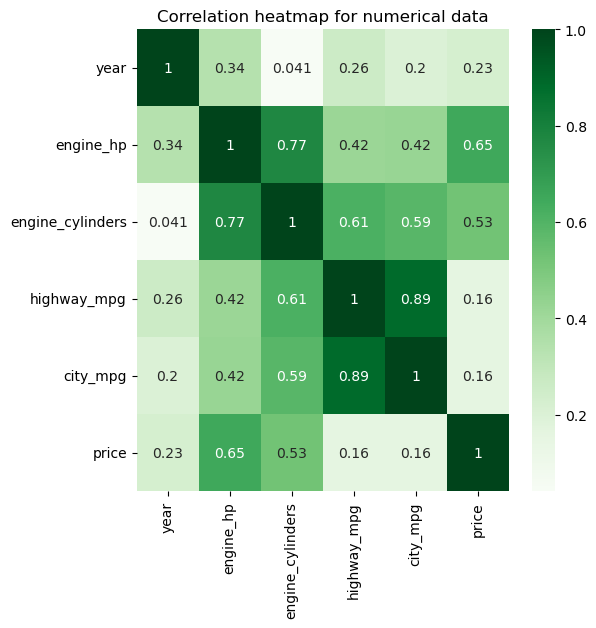

In [1382]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix,annot=True,cmap="Greens")
plt.title('Correlation heatmap for numerical data')
plt.show()

In [1383]:
correlation_matrix.unstack().sort_values(ascending=False)

year              year                1.000000
engine_hp         engine_hp           1.000000
city_mpg          city_mpg            1.000000
highway_mpg       highway_mpg         1.000000
engine_cylinders  engine_cylinders    1.000000
price             price               1.000000
highway_mpg       city_mpg            0.886829
city_mpg          highway_mpg         0.886829
engine_hp         engine_cylinders    0.774851
engine_cylinders  engine_hp           0.774851
engine_hp         price               0.650095
price             engine_hp           0.650095
engine_cylinders  highway_mpg         0.614541
highway_mpg       engine_cylinders    0.614541
engine_cylinders  city_mpg            0.587306
city_mpg          engine_cylinders    0.587306
engine_cylinders  price               0.526274
price             engine_cylinders    0.526274
city_mpg          engine_hp           0.424918
engine_hp         city_mpg            0.424918
highway_mpg       engine_hp           0.415707
engine_hp    

### Make price binary

- Now we need to turn the price variable from numeric into a binary format.

- Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.

In [1384]:
data_copy = data.copy()
price_mean = data_copy['price'].mean()
data_copy['above_average'] = (data_copy['price'] > price_mean).astype(int)
print(price_mean)
data_copy

40594.737032063116


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1


### Split the data

- Split your data in train/val/test sets with 60%/20%/20% distribution.

- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.

- Make sure that the target value (above_average) is not in your dataframe.

In [1385]:
data_copy = data_copy.drop('price',axis=1)

In [1386]:
data_full_train, data_test = train_test_split(data_copy,test_size=0.2,random_state=42)
data_train, data_val = train_test_split(data_full_train, test_size=0.25, random_state=42)

In [1387]:
data_train = data_train.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)
data_val = data_val.reset_index(drop=True)

In [1388]:
y_train = data_train['above_average'].values
y_test = data_test['above_average'].values
y_val = data_val['above_average'].values

In [1389]:
del data_train['above_average']
del data_test['above_average']
del data_val['above_average']

## Question 3: Which of these variables has the lowest mutual information score?

- Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.

- Round the scores to 2 decimals using round(score, 2).


In [1390]:
categorical = list(data_train.dtypes[data_train.dtypes == 'object'].index)
categorical

['make', 'model', 'transmission_type', 'vehicle_style']

In [1391]:
def mutual_info(series):
    return mutual_info_score(series, y_train)

score = data_train[categorical].apply(mutual_info)
round(score.sort_values(ascending=False),2)

model                0.46
make                 0.24
vehicle_style        0.08
transmission_type    0.02
dtype: float64

## Question 4: What accuracy did you get?

- Now let's train a logistic regression.

- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.

- Fit the model on the training dataset.

- To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.


In [1392]:
dv = DictVectorizer(sparse=False)

train_dicts = data_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = data_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [1393]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [1394]:
y_pred = model.predict(X_val) 

accuracy = round(accuracy_score(y_val,y_pred),2)
accuracy

0.94

## Question 5: Which of following feature has the smallest difference?

- Let's find the least useful feature using the feature elimination technique.

- Train a model with all these features (using the same parameters as in Q4).

- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.

- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.


In [1395]:
features = list(data_train.columns)
features

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg']

In [1396]:
diff = []
for f in features:
    subset = features.copy()
    subset.remove(f)
    
    train_small_dicts = data_train[subset].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_small_train = dv.fit_transform(train_small_dicts)
    
    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_small_train,y_train)
    
    val_small_dicts = data_val[subset].to_dict(orient='records')
    X_small_val = dv.transform(val_small_dicts)
    
    y_pred = model.predict(X_small_val)
    
    score = accuracy_score(y_pred, y_val)
    round_score = round(accuracy_score(y_val, y_pred),3)
    
    difference = accuracy-score
    diff.append(difference)
    print(f, score, difference)

min(diff)
    

make 0.9441879983214435 -0.0041879983214435645
model 0.9160721779269828 0.023927822073017135
year 0.9471254720939991 -0.007125472093999163
engine_hp 0.9240453210239195 0.015954678976080494
engine_cylinders 0.9471254720939991 -0.007125472093999163
transmission_type 0.9467058329836341 -0.006705832983634141
vehicle_style 0.9362148552245069 0.0037851447754930767
highway_mpg 0.9412505245488879 -0.0012505245488879657
city_mpg 0.9324381032312211 0.007561896768778831


-0.007125472093999163

## Question 6: Which of these alphas leads to the best RMSE on the validation set?

- For this question, we'll see how to use a linear regression model from Scikit-Learn.

- We'll need to use the original column price. Apply the logarithmic transformation to this column.

- Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.

- This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].

- Round your RMSE scores to 3 decimal digits.


In [1397]:
data['price'] = np.log1p(data['price'])
data.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price'],
      dtype='object')

In [1398]:
dat_full_train, dat_test = train_test_split(data,test_size=0.2,random_state=42)
dat_train, dat_val = train_test_split(dat_full_train, test_size=0.25, random_state=42)

In [1399]:
dat_train = dat_train.reset_index(drop=True)
dat_test = dat_test.reset_index(drop=True)
dat_val = dat_val.reset_index(drop=True)


In [1400]:
y_data_train = dat_train['price'].values
y_data_test = dat_test['price'].values
y_data_val = dat_val['price'].values

In [1401]:
del dat_train['price']
del dat_test['price']
del dat_val['price']

In [1402]:
dv=DictVectorizer(sparse=True)

train_data = dat_train.to_dict(orient='records')
X_data_train = dv.fit_transform(train_data)

val_data = dat_val.to_dict(orient='records')
X_data_val = dv.transform(val_data)

In [1403]:
for a in [0, 0.01, 0.1, 1, 10]:
    model2 = Ridge(alpha=a, solver='sag', random_state=42)
    model2.fit(X_data_train,y_data_train)
    
    y_data_pred = model2.predict(X_data_val)
    
    
    score = np.sqrt(mean_squared_error(y_data_val,y_data_pred))
    
    print(a, round(score, 3))

0 0.251
0.01 0.255
0.1 0.255
1 0.258
10 0.336
